In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import tree
%matplotlib inline
from sklearn.metrics import accuracy_score
import os, glob, pickle
from sklearn import tree
from sklearn.model_selection import train_test_split

In [82]:

from sklearn.model_selection import GridSearchCV
import warnings
from numpy import std
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import pandas as pd
from sklearn import model_selection
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import tree
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler
df=pd.read_csv("E:/4.dataset_150.csv")
X=df.iloc[:,:18]
y=df['output_grade']
y=y.values.ravel()
scaler = MinMaxScaler(feature_range=(0, 1))
x= scaler.fit_transform(X)
# prepare the cross-validation procedure
lda = LDA(n_components=1)
x = lda.fit_transform(x, y)
#cv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=41)
from sklearn.model_selection import GridSearchCV
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25) 

parameters={"splitter":["best","random"],
            "max_depth" : [5,9,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5],
           #"max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[2,5,10,15,20,50],
            "min_samples_split":[2,3,4,5,6,7,8,10],
            "criterion":["entropy","gini"]
           }

model=tree.DecisionTreeClassifier()
model=GridSearchCV(model,param_grid=parameters,scoring='accuracy',cv=3)
 
# fitting the model for grid search
model.fit(x_train, y_train)
print("Tuned Hyperparameters :", model.best_params_)
print("Accuracy :",model.best_score_)

Tuned Hyperparameters : {'criterion': 'entropy', 'max_depth': 5, 'max_leaf_nodes': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.1, 'splitter': 'best'}
Accuracy : 0.9284020862968232


In [ ]:
#Tuned Hyperparameters : {'criterion': 'entropy', 'max_depth': 5, 'max_leaf_nodes': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.1, 'splitter': 'best'}
#Accuracy : 0.9284020862968232

In [83]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
x = lda.fit_transform(x, y)
#x_test = lda.transform(x_test)

In [91]:
from sklearn import tree
model=tree.DecisionTreeClassifier(criterion= 'entropy', max_depth=5, max_leaf_nodes= 5, 
                                  min_samples_leaf= 1,min_samples_split= 2, min_weight_fraction_leaf= 0.1,
                                  splitter='best')

In [92]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [93]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=5,
                       min_weight_fraction_leaf=0.1)

In [94]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
y_pred=model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.90      1.00      0.95         9
           2       0.83      0.62      0.71         8
           3       0.83      0.91      0.87        11
           4       1.00      1.00      1.00        10

    accuracy                           0.89        38
   macro avg       0.89      0.88      0.88        38
weighted avg       0.89      0.89      0.89        38



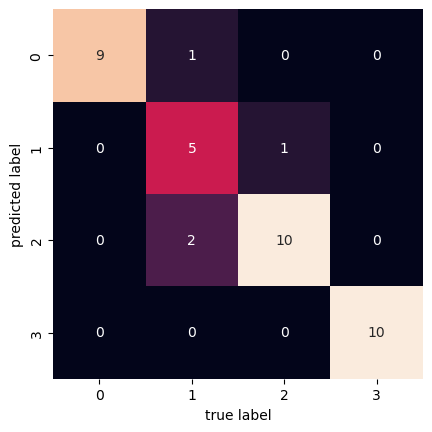

In [95]:
#cm=confusion_matrix(y_test,y_pred)
#cm
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
#plt.figure(figsize=(10,7))
mat = confusion_matrix(y_test,y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [96]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.90      1.00      0.95         9
           2       0.83      0.62      0.71         8
           3       0.83      0.91      0.87        11
           4       1.00      1.00      1.00        10

    accuracy                           0.89        38
   macro avg       0.89      0.88      0.88        38
weighted avg       0.89      0.89      0.89        38



In [97]:

accuracy_score(y_pred,y_test)

0.8947368421052632

In [ ]:
#training and validation accuracy

In [98]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)
# evaluate model
scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (100*mean(scores), 100*std(scores)))

Accuracy: 90.000 (4.472)


In [100]:
#Testing Accuracy
model.fit(x_train, y_train)
y_pred=model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.82      1.00      0.90         9
           2       0.78      0.88      0.82         8
           3       1.00      0.73      0.84        11
           4       1.00      1.00      1.00        10

    accuracy                           0.89        38
   macro avg       0.90      0.90      0.89        38
weighted avg       0.91      0.89      0.89        38



In [105]:
from numpy import mean
from numpy import std
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import pandas as pd
from sklearn import model_selection
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import tree
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

def cross_validation(model,x,y,cv=5):     
    scoring={'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, average = 'macro'),
           'recall': make_scorer(recall_score, average = 'macro'),
           'f1_macro': make_scorer(f1_score, average = 'macro'),
           #'f1_weighted': make_scorer(f1_score, average = 'weighted')
        }    
    results = cross_validate(model, x, y, scoring=scoring, cv=cv, n_jobs=-1, return_train_score=True)

    return {"Training Accuracy scores": results['train_accuracy'],
             "Validation Accuracy scores": results['test_accuracy'], 
            
              "Training Precision scores": results['train_precision'],
              "Validation Precision scores": results['test_precision'],
          
              "Training Recall scores": results['train_recall'],
             "Validation Recall scores": results['test_recall'],
            
              "Training F1 scores": results['train_f1_macro'],
             "Validation F1 scores": results['test_f1_macro'],
            
             "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Mean Training Precision": results['train_precision'].mean(),
              "Mean Validation Precision": results['test_precision'].mean(),
              "Mean Training Recall": results['train_recall'].mean(),
              "Mean Validation Recall": results['test_recall'].mean(),
              "Mean Training F1 Score": results['train_f1_macro'].mean(),
              "Mean Validation F1 Score": results['test_f1_macro'].mean()
                      }



decision_tree_result = cross_validation(model, x_train,y_train, 5)
print(decision_tree_result)

# report performance
#print('%.3f', 100*scores)
#print('Accuracy: %.3f (%.3f)' % (100*mean(scores['accuracy_score']), 100*std(scores['accuracy'])))

{'Training Accuracy scores': array([0.93258427, 0.92134831, 0.94444444, 0.93333333, 0.96666667]), 'Validation Accuracy scores': array([0.95652174, 1.        , 0.90909091, 0.95454545, 0.81818182]), 'Training Precision scores': array([0.94216649, 0.93194444, 0.95069444, 0.94666667, 0.96527778]), 'Validation Precision scores': array([0.96428571, 1.        , 0.92261905, 0.95      , 0.90909091]), 'Training Recall scores': array([0.9367236 , 0.92532468, 0.94561688, 0.93668831, 0.97127329]), 'Validation Recall scores': array([0.96428571, 1.        , 0.92857143, 0.95833333, 0.8       ]), 'Training F1 scores': array([0.93519444, 0.92407423, 0.94529661, 0.93872126, 0.96717276]), 'Validation F1 scores': array([0.96153846, 1.        , 0.91637529, 0.94949495, 0.77777778]), 'Mean Training Accuracy': 93.96754057428215, 'Mean Validation Accuracy': 92.76679841897233, 'Mean Training Precision': 0.9473499642493743, 'Mean Validation Precision': 0.9491991341991343, 'Mean Training Recall': 0.943125352907961

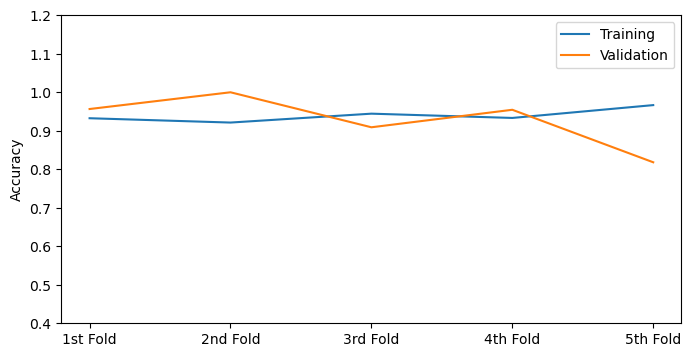

In [106]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold","6th Fold","7th Fold"]
X_axis = np.arange(len(labels))
plt.xticks(X_axis, labels)  
# Function to plot  
plt.ylim(0.40000, 1.2)
plt.plot(
decision_tree_result["Training Accuracy scores"])
plt.plot(
decision_tree_result["Validation Accuracy scores"])
plt.ylabel("Accuracy")  
# Function add a legend  
plt.legend(["Training", "Validation"], loc ="upper right")
  
# function to show the plot
plt.show()

In [3]:

import numpy as np
def plot_result(x_label, y_label, plot_title, train_data, val_data):
               
        # Set size of plot
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.2, color='blue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.2, color='red', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

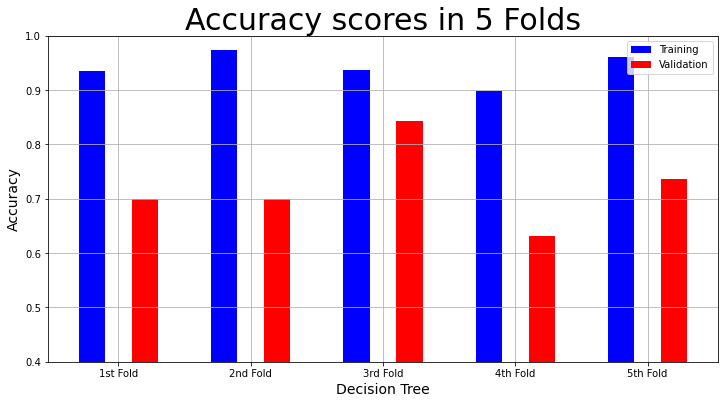

In [4]:
# Plot Accuracy Result
from matplotlib import pyplot as plt
%matplotlib inline
model_name = "Decision Tree"
plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 5 Folds",
            decision_tree_result["Training Accuracy scores"],
            decision_tree_result["Validation Accuracy scores"])

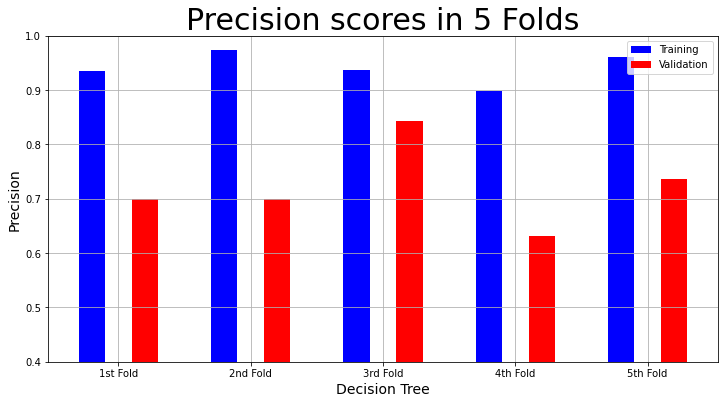

In [5]:
# Plot Precision Result
plot_result(model_name,
            "Precision",
            "Precision scores in 5 Folds",
            decision_tree_result["Training Precision scores"],
            decision_tree_result["Validation Precision scores"])

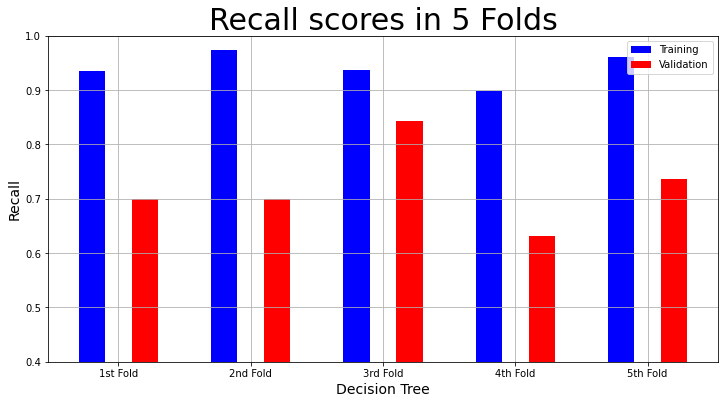

In [6]:
# Plot Recall Result
plot_result(model_name,
            "Recall",
            "Recall scores in 5 Folds",
            decision_tree_result["Training Recall scores"],
            decision_tree_result["Validation Recall scores"])

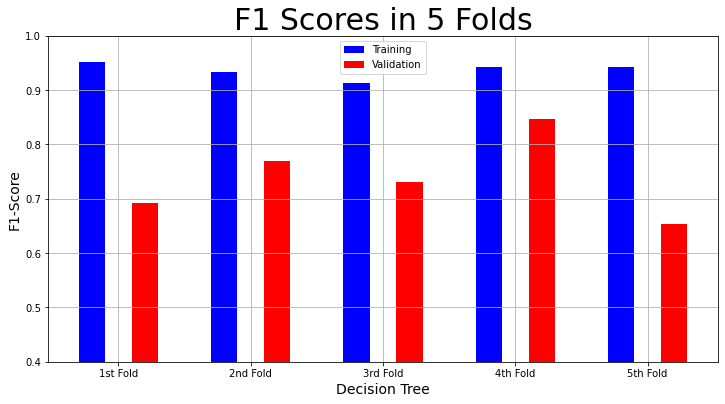

In [84]:
# Plot F1-Score Result
plot_result(model_name,
            "F1-Score",
            "F1 Scores in 5 Folds",
            decision_tree_result["Training F1 scores"],
            decision_tree_result["Validation F1 scores"])